# Multiple Linear Regression Model
## Bike Sharing Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues.

Essentially, the company wants —
 - To identify the variables significantly affectingnt in predicting the demand for shared bikes - To model the demand for shared bikes with the available independent variables.c .

- To create a linear model that quantitativeshared bikes demand with variable.

- To know the accuracy of the model, i.e. how well these variables can predishare bikes demandsces.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data inspection

In [173]:
df.shape

(730, 16)

In [175]:
df.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspee

In [177]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [179]:
# check for duplicates and dropping the duplicate row
duplicates = df[df.duplicated()]
duplicates

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [181]:
# Date  object -Fixing  

In [183]:
df['dteday'] = pd.to_datetime(df['dteday'],format="%d-%m-%Y")

In [185]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [187]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [189]:
df[['casual', 'registered',
       'cnt']].describe()

,casual,registered,cnt
count,730.000000,730.000000,730.000000
mean,849.249315,3658.757534,4508.006849
std,686.479875,1559.758728,1936.011647
min,2.000000,20.000000,22.000000
25%,316.250000,2502.250000,3169.750000
50%,717.000000,3664.500000,4548.500000
75%,1096.500000,4783.250000,5966.000000
max,3410.000000,6946.000000,8714.000000


# Missing Value and Outlier Check

In [193]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Step-2: Visualising the data

<Axes: ylabel='cnt'>

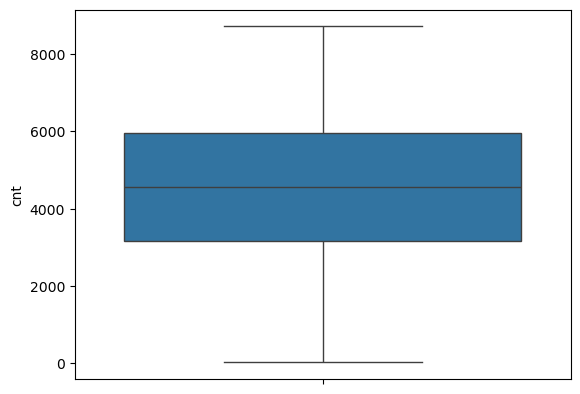

In [196]:
sns.boxplot(df['cnt'])

<Axes: ylabel='registered'>

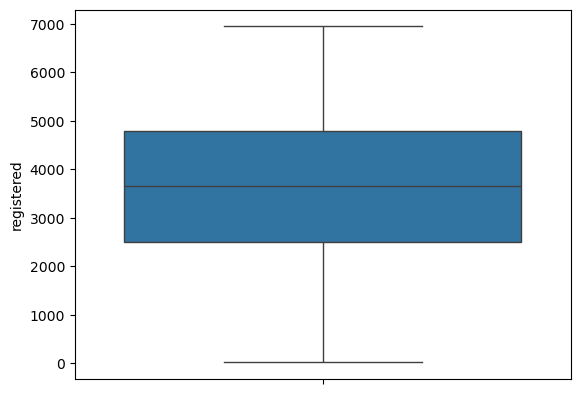

In [198]:
sns.boxplot(df['registered'])

<Axes: ylabel='casual'>

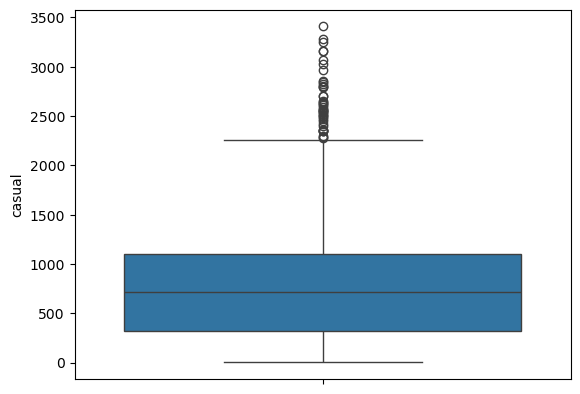

In [200]:
sns.boxplot(df['casual'])

In [202]:
# There are outliers in casual boxplot. 
# Since cnt: count of total rental bikes including both casual and registered so considering cnt as target variable 

In [204]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [206]:
# season : season (1:spring, 2:summer, 3:fall, 4:winter)
# maping season column with the informative value

In [208]:
sm = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season_name'] = df['season'].map(sm)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring


In [210]:
# maping weathersit  with the informative value   

In [212]:
wm = {1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'}
df['weathersit_name']= df['weathersit'].map(wm)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,weathersit_name
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,Mist
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,Mist
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,Clear
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,Clear
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,Clear


# Exploratory Data Analysis

In [215]:
# given dataset characteristics represented these values
#   - yr : year (0: 2018, 1:2019)
#	- mnth : month ( 1 to 12)
#	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#	- weekday : day of the week
#	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

<Axes: xlabel='weekday', ylabel='cnt'>

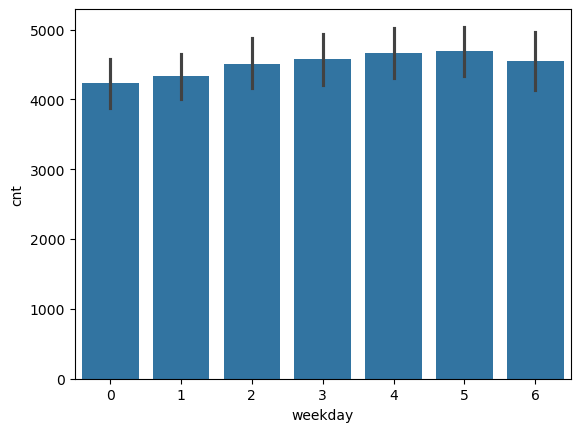

In [217]:
# weekend vs weekday views
sns.barplot(data=df,x='weekday',y='cnt')

In [218]:
# Rentel cnt are more Thrusday to Sunday compare to Monday to Wednesday 

<Axes: xlabel='workingday', ylabel='cnt'>

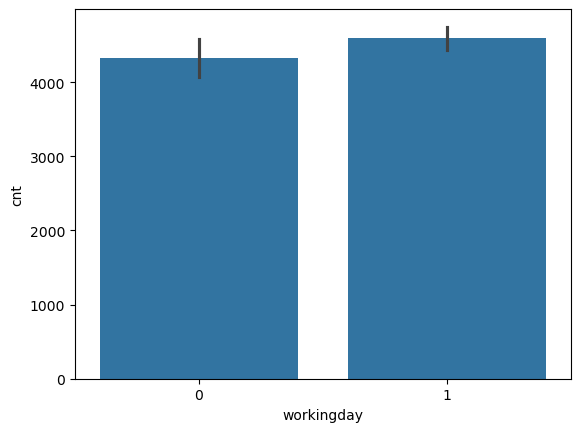

In [221]:
# working day v/s cnt
sns.barplot(data=df,x='workingday',y='cnt')

In [223]:
# working dat cnt is high compare to holiday or weekends 

In [225]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_name', 'weathersit_name'],
      dtype='object')

<Axes: xlabel='season_name', ylabel='cnt'>

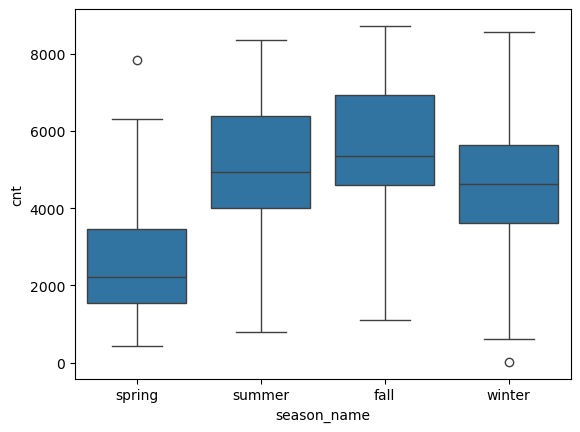

In [227]:
# 1) season, cnt
sns.boxplot(data=df,x='season_name',y='cnt')

In [229]:
# Average rental bikes cnt are low in spring

<Axes: xlabel='mnth', ylabel='cnt'>

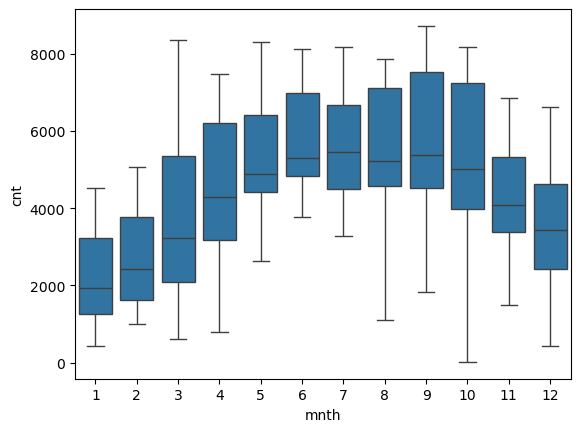

In [231]:
# 2) month, cnt
sns.boxplot(data=df,x='mnth',y='cnt')

<Axes: xlabel='weathersit_name', ylabel='cnt'>

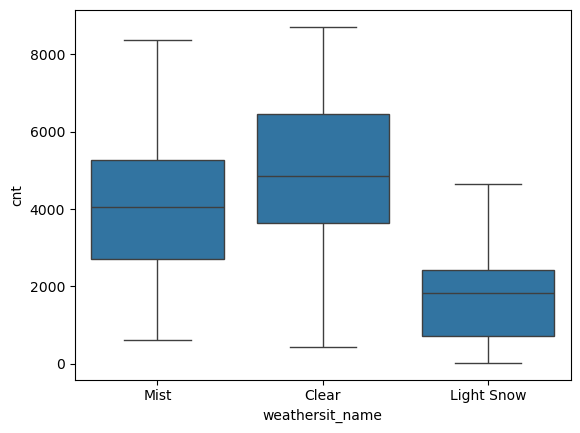

In [233]:
# 3) weathesit, cnt
sns.boxplot(data=df,x='weathersit_name',y='cnt')

In [235]:
# Analysis: Bike rent cnt is low during Light Snow and nill during Heavy rain 

<Axes: xlabel='temp', ylabel='cnt'>

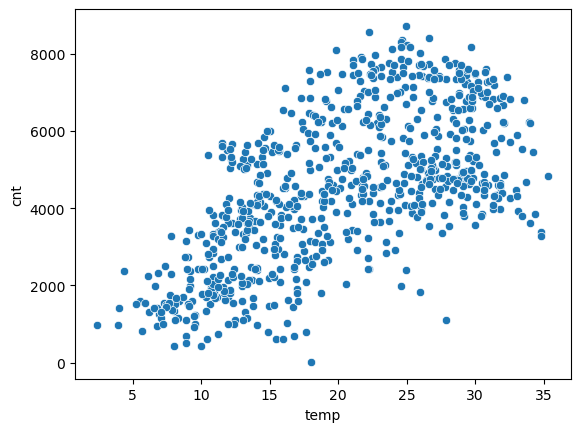

In [237]:
# 3) temp, cnt
sns.scatterplot(data=df,x='temp',y='cnt')

<Axes: xlabel='atemp', ylabel='cnt'>

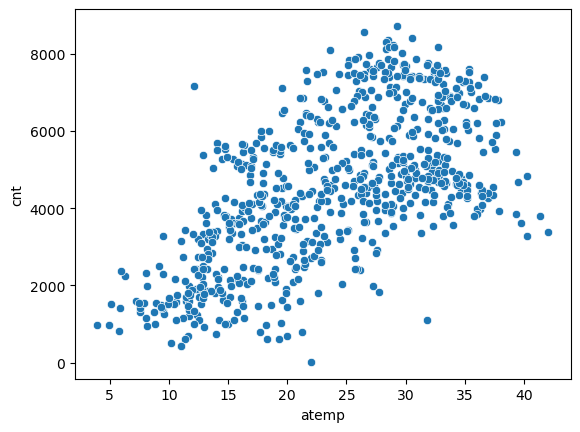

In [239]:
# 4) atemp, cnt
sns.scatterplot(data=df,x='atemp',y='cnt')

<Axes: xlabel='hum', ylabel='cnt'>

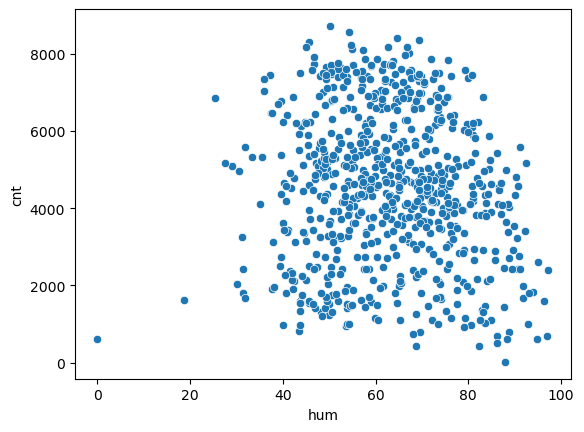

In [241]:
# 5) humidity, cnt
sns.scatterplot(data=df,x='hum',y='cnt')

<Axes: xlabel='windspeed', ylabel='cnt'>

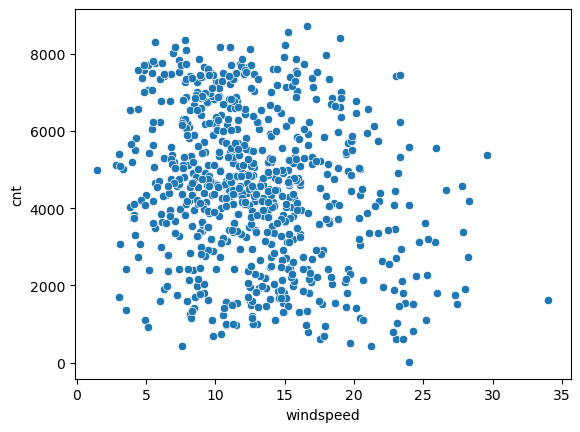

In [243]:
# 5) windspeed, cnt
sns.scatterplot(data=df,x='windspeed',y='cnt')

In [245]:
# Visualising of Categorical variables

In [247]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_name', 'weathersit_name'],
      dtype='object')

<Axes: xlabel='yr', ylabel='cnt'>

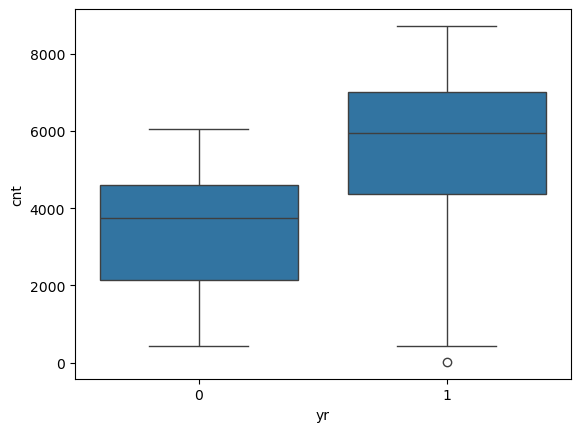

In [249]:
sns.boxplot(data= df, x= 'yr', y= 'cnt')

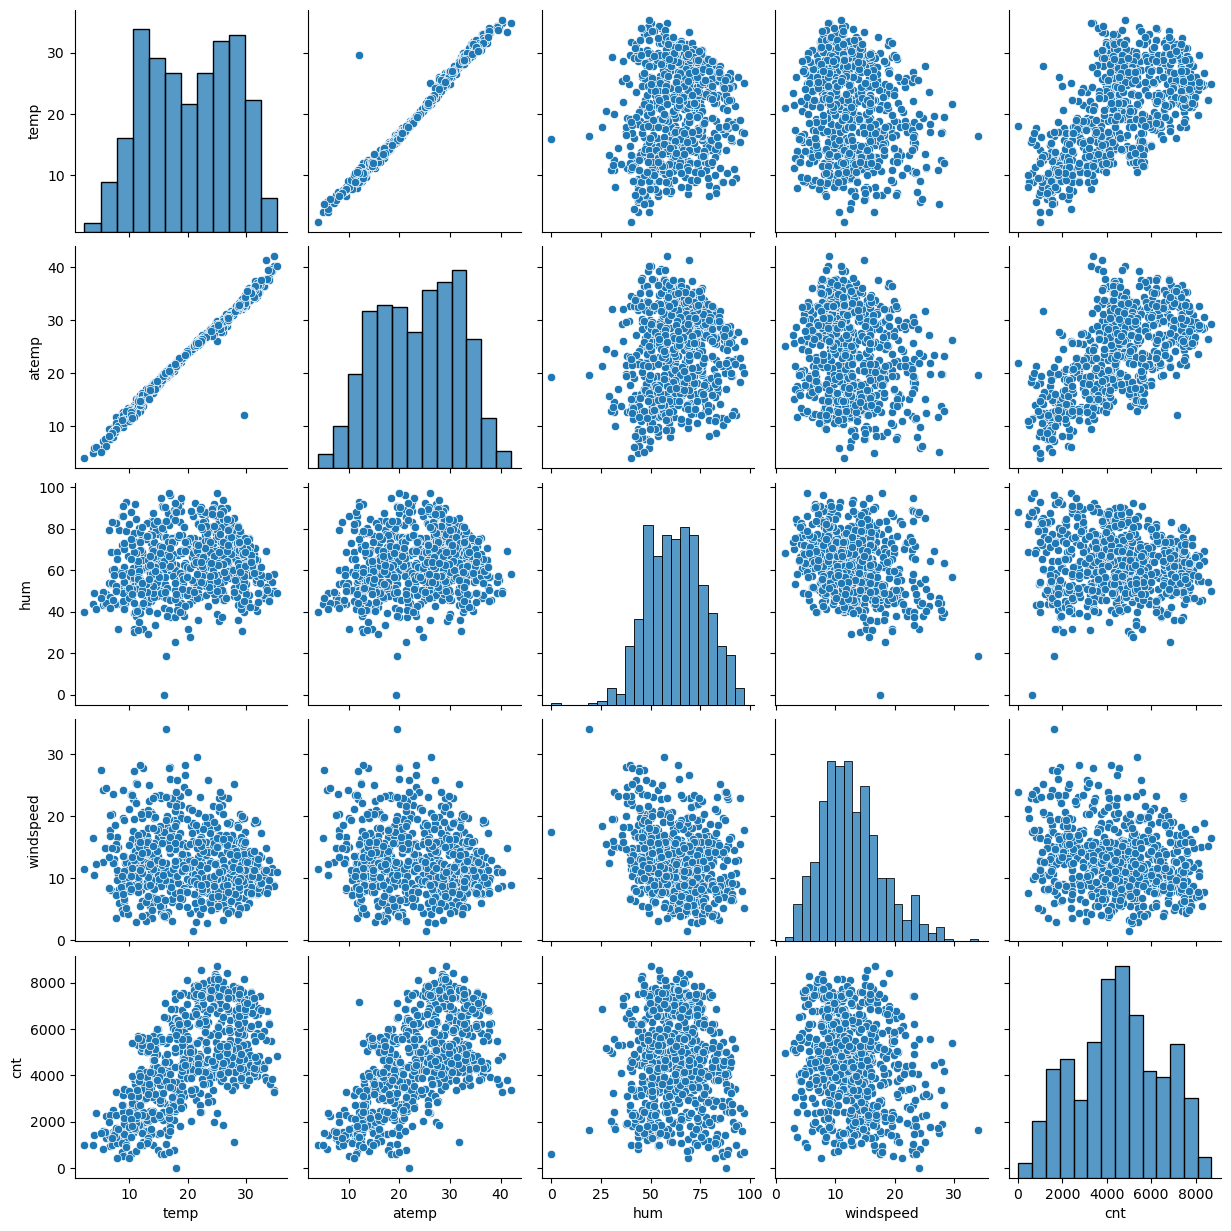

In [251]:
sns.pairplot(data=df, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

# Step 3- Data Preparation

In [254]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,weathersit_name
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,Mist
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,Mist
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,Clear
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,Clear
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,Clear


In [256]:
# Variables 'Weathersit' and 'season' have values 1,2,3,4 associated with specific label 
# creating dunmmy variable for them

# Dummy Variables

In [259]:
#season_status = pd.get_dummies(df['season_name']).astype(int)
#season_status.head()

In [261]:
# we can drop the first column 'fall', season will be identified with these values
# 000 - fall
# 100 - spring
# 010 - summer
# 001 - winter
season_status = pd.get_dummies(df['season_name'],drop_first=True).astype(int)
season_status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [263]:
#weathersit_status = pd.get_dummies(df['weathersit_name']).astype(int)
#weathersit_status.head()

In [265]:
# we can drop the first column 'Clear', season will be identified with these values
# 00 - Clear
# 10 - Light Snow
# 01 - Mist
weathersit_status = pd.get_dummies(df['weathersit_name'],drop_first=True).astype(int)
weathersit_status.head()

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [267]:
# Add result to the original data frame 

In [269]:
df = pd.concat([df,season_status,weathersit_status], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,season_name,weathersit_name,spring,summer,winter,Light Snow,Mist
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,...,331,654,985,spring,Mist,1,0,0,0,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,...,131,670,801,spring,Mist,1,0,0,0,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,...,120,1229,1349,spring,Clear,1,0,0,0,0
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,...,108,1454,1562,spring,Clear,1,0,0,0,0
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,...,82,1518,1600,spring,Clear,1,0,0,0,0


In [271]:
# drop the weathersit_name, season_name, mnt_name, instant 
df.drop(['weathersit','season','weathersit_name', 'season_name', 'instant'], axis = 1, inplace = True)
df.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light Snow,Mist
0,2018-01-01,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2018-01-02,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,2018-01-03,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,2018-01-04,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,2018-01-05,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


# Step 4: Splitting the Data into Training and Testing Sets

In [274]:
import statsmodels
import statsmodels.api as sm 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [276]:
np.random.seed(0)
# splitting train and test data in 70:30 ratio 
df_train, df_test = train_test_split(df, train_size =0.7, test_size = 0.3, random_state = 100)

In [278]:
# Scaling, normalize or scale data such that all features lie within a specific range.
# using Min-Max scaling approach 

In [280]:
scaler = MinMaxScaler()

In [282]:
df.columns

Index(['dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'spring',
       'summer', 'winter', 'Light Snow', 'Mist'],
      dtype='object')

In [284]:
# Applying scaler() to the columns having numerical values except 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [286]:
df_train.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light Snow,Mist
653,2019-10-16,1,10,0,2,1,0.509887,0.501133,0.575354,0.300794,922,6612,0.864243,0,0,1,0,0
576,2019-07-31,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,968,6248,0.827658,0,0,0,0,0
426,2019-03-03,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,956,3110,0.465255,1,0,0,0,1
728,2019-12-30,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,364,1432,0.204096,1,0,0,0,0
482,2019-04-28,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,1120,3100,0.482973,0,1,0,0,1


In [288]:
df_train.describe()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light Snow,Mist
count,510,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,2019-01-03 22:35:17.647058944,0.507843,6.549020,0.025490,2.990196,0.676471,0.537262,0.512989,0.650369,0.320768,837.543137,3648.839216,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137
min,2018-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2018-07-06 06:00:00,0.000000,3.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,311.000000,2468.250000,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2019-01-08 00:00:00,1.000000,7.000000,0.000000,3.000000,1.000000,0.540519,0.526811,0.653714,0.296763,700.000000,3657.000000,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,2019-07-07 18:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1076.250000,4841.000000,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000
max,2019-12-30 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
std,NaN,0.500429,3.468714,0.157763,2.017093,0.468282,0.225844,0.212385,0.145882,0.169797,675.921998,1580.336986,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223


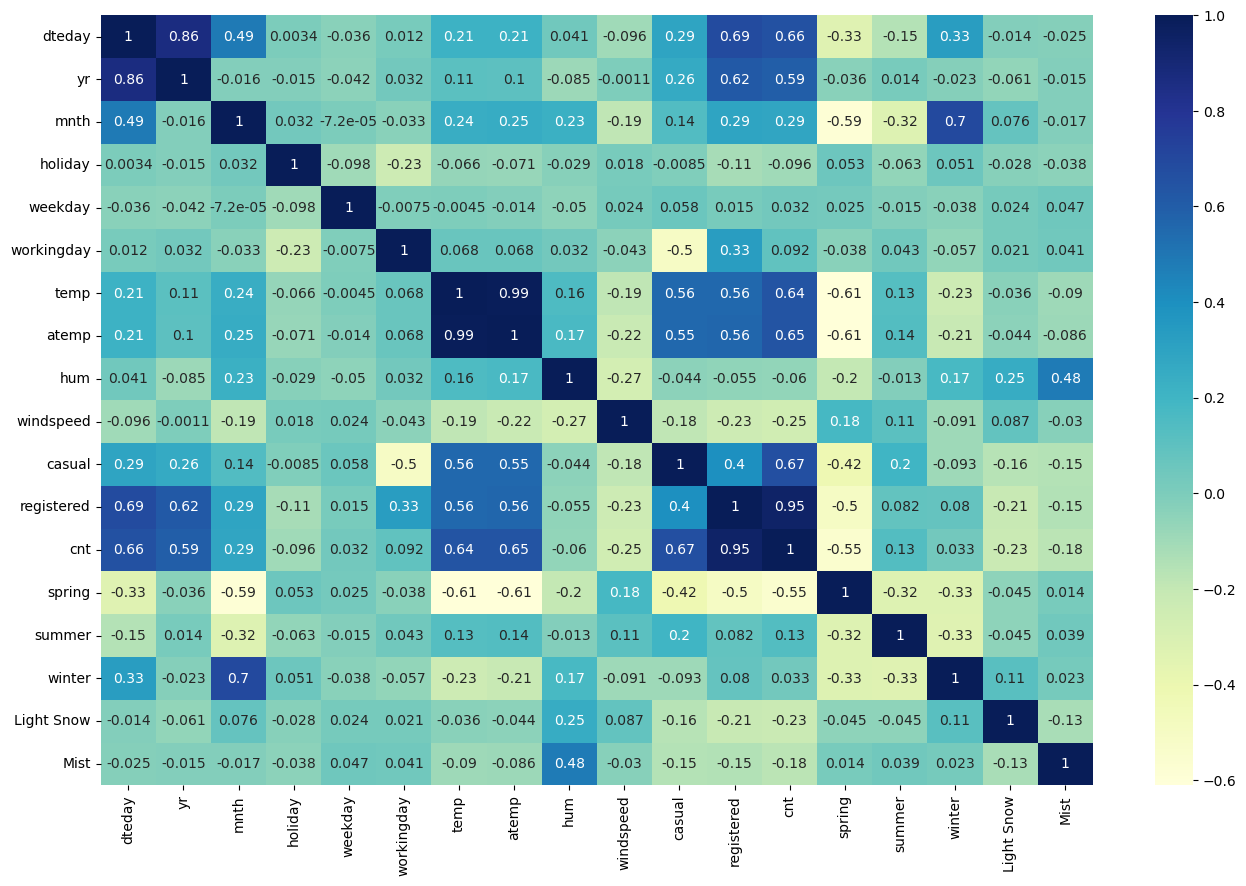

In [290]:
# checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Step 5 - Multilinear Regression
### Adding all the variables to the model

In [293]:
df.columns

Index(['dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'spring',
       'summer', 'winter', 'Light Snow', 'Mist'],
      dtype='object')

In [295]:
X_train = df[['temp','atemp', 'hum', 'windspeed','spring', 'summer','winter','Light Snow','Mist','holiday','weekday','workingday']]
y_train = df['cnt']
X_train_lm= sm.add_constant(X_train)
# Model 1 
lr_1 = sm.OLS(y_train,X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     76.94
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          4.18e-120
Time:                        08:33:54   Log-Likelihood:                -6258.2
No. Observations:                 730   AIC:                         1.254e+04
Df Residuals:                     717   BIC:                         1.260e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3281.6890    461.535      7.110      0.0

In [297]:
# Looking at the p-values, it looks like some of the variables aren't significant (in the presence of other variables).
# Checking with the VIF information.

In [299]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,618.56
0,temp,587.97
2,hum,27.97
3,windspeed,6.89
4,spring,3.87
11,workingday,3.34
10,weekday,3.16
6,winter,3.05
5,summer,2.35
8,Mist,2.28


In [301]:
# p-value ≤ 0.05: The variable is statistically significant and should typically be retained.
# p-value > 0.05: The variable is not statistically significant and might be a candidate for removal, especially if it doesn't improve the model.
# VIF < 5: Low multicollinearity; the variable is generally acceptable.
# 5 ≤ VIF < 10: Moderate multicollinearity; consider reviewing the variable.
# VIF ≥ 10: High multicollinearity; the variable might need to be removed or further investigated.

In [303]:
# atemp p-value 0.763 & VIF 618.56  this can be drop 

# Dropping the variable and updating the model

In [306]:
# drop 'atemp' variable   

In [308]:
X = X_train.drop('atemp', axis=1)

In [310]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)
# Model 2
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     84.04
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          4.65e-121
Time:                        08:34:19   Log-Likelihood:                -6258.2
No. Observations:                 730   AIC:                         1.254e+04
Df Residuals:                     718   BIC:                         1.260e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3302.7386    455.930      7.244      0.0

In [312]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,27.19
0,temp,17.17
2,windspeed,6.78
3,spring,3.67
10,workingday,3.34
9,weekday,3.16
5,winter,2.83
7,Mist,2.27
4,summer,2.21
6,Light Snow,1.28


In [314]:
# workingday p-value 0.347   drop this b'cos of high p-value >0.05 

In [316]:
X = X.drop('workingday', axis=1)
# Build a 3rd fitted model
X_train_lm = sm.add_constant(X)
# Model 3
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     92.37
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          7.31e-122
Time:                        08:34:21   Log-Likelihood:                -6258.7
No. Observations:                 730   AIC:                         1.254e+04
Df Residuals:                     719   BIC:                         1.259e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3362.6083    451.437      7.449      0.0

In [318]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,27.13
0,temp,16.49
2,windspeed,6.77
3,spring,3.57
9,weekday,3.15
5,winter,2.77
7,Mist,2.27
4,summer,2.19
6,Light Snow,1.28
8,holiday,1.04


In [320]:
# hum  VIF is 27.13  drop this variable 

In [322]:
X = X.drop('hum', axis=1)
# Build a 4th fitted model
X_train_lm = sm.add_constant(X)
# Model 4
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     95.50
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          1.38e-116
Time:                        08:34:35   Log-Likelihood:                -6273.5
No. Observations:                 730   AIC:                         1.257e+04
Df Residuals:                     720   BIC:                         1.261e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2021.0758    386.115      5.234      0.0

In [324]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,6.74
0,temp,5.06
8,weekday,3.15
2,spring,2.22
3,summer,1.88
4,winter,1.69
6,Mist,1.53
5,Light Snow,1.08
7,holiday,1.04


In [326]:
 # VIFs and p-values both are within an acceptable range. So going ahead and make our predictions using this model.

# Step 6 : Residual Analysis of the train data

In [329]:
y_train_cnt = lr_4.predict(X_train_lm)

C:\Users\Sushant\AppData\Local\Temp\ipykernel_27372\2756863869.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

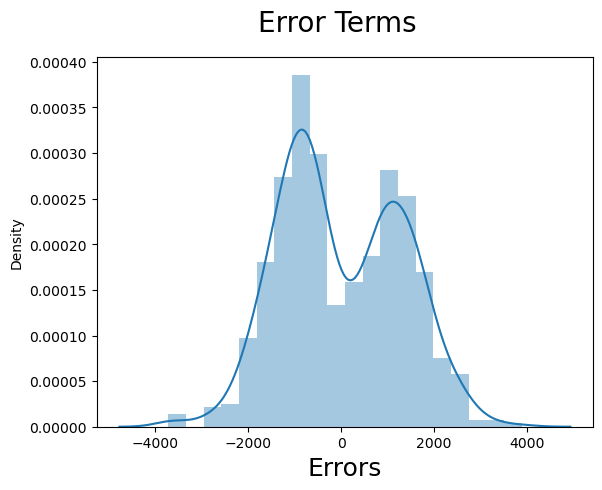

In [331]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Step 7: Making Predictions Using the Final Model

In [334]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [336]:
df_test.describe()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light Snow,Mist
count,219,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2018-12-22 18:37:48.493150720,0.479452,6.474886,0.036530,3.018265,0.698630,0.558941,0.532991,0.638508,0.313350,875.968037,3671.013699,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635
min,2018-01-04 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,9.000000,432.000000,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-06-20 00:00:00,0.000000,4.000000,0.000000,1.000000,0.000000,0.354650,0.344751,0.527265,0.198517,336.500000,2507.500000,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018-12-15 00:00:00,0.000000,6.000000,0.000000,3.000000,1.000000,0.558691,0.549198,0.627737,0.299459,736.000000,3667.000000,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019-06-21 12:00:00,1.000000,9.000000,0.000000,5.000000,1.000000,0.759096,0.714132,0.743928,0.403048,1190.000000,4624.000000,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000
max,2019-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,3410.000000,6844.000000,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.500722,3.421875,0.188034,1.988415,0.459904,0.233698,0.217888,0.148974,0.159947,712.783588,1509.322560,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403


#### Dividing into X_test and y_test

In [339]:
print("Training Features:", list(X_train_lm.columns))

Training Features: ['const', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'Light Snow', 'Mist', 'holiday', 'weekday']


In [341]:
X_train_lm.shape

(730, 10)

In [343]:
y_test = df_test.pop('cnt')
X_test = df_test

In [345]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [347]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4[X_train_lm.columns]

In [349]:
X_test_m4.shape

(219, 10)

In [351]:
# Making predictions using the 4th model

y_pred_m4 = lr_4.predict(X_test_m4)

# Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

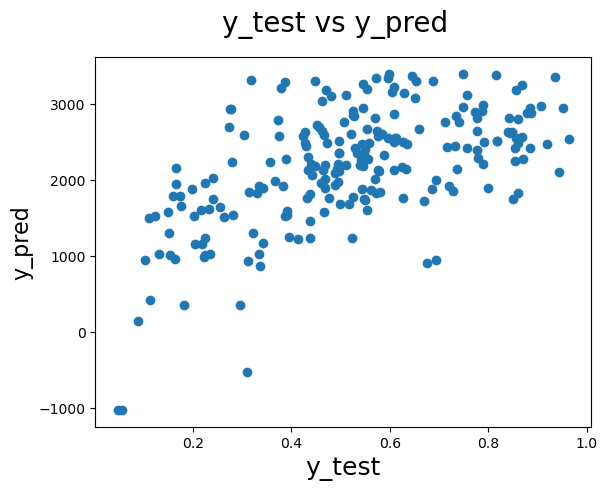

In [354]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Equation of the best fitted line is:

$ cnt = 2021.0758 + 139.3399 \times temp -33.5792 \times windspeed - 519.2223 \times spring + 408.4935 \times summer + 883.2735 \times winter - 2752.6991 \times Light Snow - 658.4130 \times Mist - 604.9378 \times holiday + 70.8635 \times weekday $